In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Задание 1. A/B–тестирование
1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

На какие метрики Вы смотрите в ходе анализа и почему?

Имеются ли различия в показателях и с чем они могут быть связаны?

Являются ли эти различия статистически значимыми?

Стоит ли запускать новую механику на всех пользователей?

Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

1.4 Требования к ответу

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [2]:
#загрузка данных
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/Doc/Проект_2_groups.csv', sep = ';')

In [3]:
#первично полученные данные о пользователи и его группе 
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [4]:
# проверка на повторы
groups.nunique()

id     74484
grp        2
dtype: int64

In [5]:
# загрузим дополнительные данные
groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/Doc/Проект_2_group_add.csv', sep = ',')

In [6]:
# добавленные после начала эксперимента пользователи в группы
groups_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [7]:
# проверка на повторы
groups_add.nunique()

id     92
grp     2
dtype: int64

In [8]:
# Загрузка данных об активных пользователей
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/Doc/Проект_2_active_studs.csv')

In [9]:
# пользователи, которые перешли в состояние активных
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [10]:
# проверка на повторы
active_studs.nunique()

student_id    8341
dtype: int64

In [11]:
# переименнуем для удобства
active_studs = active_studs.rename(columns={'student_id':'id'}) # переименнуем для удобства

In [12]:
# загрузим данные о прибыли с клиента
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/Doc/Проект_2_checks.csv', sep = ';')

In [13]:
# активные пользователи, которые перешли в состояние клиентов
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [14]:
# проверка на повторы
checks.nunique()

student_id    541
rev            39
dtype: int64

In [15]:
# переименнуем для удобства
checks = checks.rename(columns={'student_id':'id'})

Используемые метрики:

1) Конверсия из неактивных пользователей в активных (CRna)

При влиянии данной метрики на статистическую значимость можно судить, что есть третий факт, который влияет на выборки.
Этот вывод можно сделать потому что данная метрика не должна была измениться в новой механике

2) Конверсия активных пользователей в клиента (CRac)

3) Средний доход на клиента (ARPPU)


In [16]:
# объединение двух групп (в последущуем будут изучать первичная группа и расширенная группа)
groups_big = pd.concat([groups,groups_add])

In [17]:
groups_big

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [18]:
# проверка на появление повторов
groups_big.nunique()

id     74576
grp        2
dtype: int64

Сначала проведем исследование расширенной группы

In [19]:
# определим для активного пользователя группу
groups_big_active = pd.merge(active_studs,groups_big, on = 'id')

In [20]:
groups_big_active

,id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [21]:
# проверим на появление нулевых данных
groups_big_active.isnull().sum()

id     0
grp    0
dtype: int64

In [22]:
# определим для активного пользователя его прибыль
groups_big_active_checks = pd.merge(groups_big_active,checks, on = 'id')

In [23]:
groups_big_active_checks

,id,grp,rev
0,1184303,A,1530.0000
1,3354191,B,1900.0001
2,3278734,B,1900.0000
3,720651,A,1980.0000
4,1232221,B,1900.0000
...,...,...,...
387,3890326,B,199.0000
388,1390994,A,398.0000
389,1516339,A,290.0000
390,3910596,B,597.0000


In [24]:
# проверим на появление нулевых данных
groups_big_active_checks.isnull().sum() 

id     0
grp    0
rev    0
dtype: int64

In [25]:
#датафрейм для статистических данных, введем ARPPU
df_gr = groups_big_active_checks.groupby('grp',as_index=False).agg({'rev':'mean'}).rename(columns={'rev':'ARPPU'})

# добавим метрику CRna
df_na = (groups_big_active.groupby('grp').agg({'id':'count'}) / groups_big.groupby('grp').agg({'id':'count'})).reset_index().rename(columns={'id':'Cr_na'})
df_gr = pd.merge(df_gr,df_na,on = 'grp')

# добавим метрику CRac
df_ac = (groups_big_active_checks.groupby('grp').agg({'id':'count'}) / groups_big_active.groupby('grp').agg({'id':'count'})).reset_index().rename(columns={'id':'Cr_ac'})
df_gr = pd.merge(df_gr,df_ac,on = 'grp')

In [26]:
df_gr

,grp,ARPPU,Cr_na,Cr_ac
0,A,933.589744,0.104676,0.050715
1,B,1257.878992,0.113605,0.046156


Проведем исследования данных

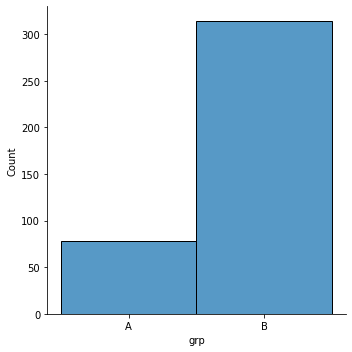

In [27]:
# посмотрим сколько людей в группе А и В
sns.displot(groups_big_active_checks.grp)

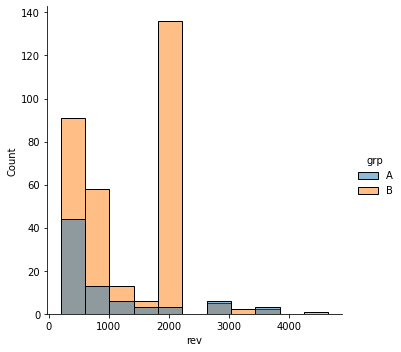

In [28]:
# посмотрим распределение прибыли
sns.displot(data=groups_big_active_checks, x="rev", hue="grp")

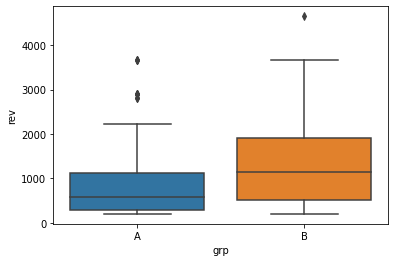

In [29]:
# глянем выбросы данных
sns.boxplot(data=groups_big_active_checks, y="rev", x="grp")

Проверим распределение на нормальность

In [30]:
import scipy.stats as stats

# сделаем датафреймы с группами, где будет хранится rev
group_A = groups_big_active_checks[groups_big_active_checks['grp'] == 'A'][['rev']]
group_B = groups_big_active_checks[groups_big_active_checks['grp'] == 'B'][['rev']]

# проведем тест на нормальность распределения для А
st, p = stats.normaltest(group_A)
print('st = ', st)
print('p = ', p)

# H0 - Данные имеют нормальное распределение
# H1 - Данные не имеют нормального распределения

if p[0] > 0.05:
    print('Данные имеют нормальное распределение для группы A')
else: 
    print('Данные не имеют нормальное распределение для группы A')

# проведем тест на нормальность распределения для В
st, p = stats.normaltest(group_B)
         
if p[0] > 0.05:
    print('Данные имеют нормальное распределение для группы B')
else: 
    print('Данные не имеют нормальное распределение для группы B')


st =  [30.37841964]
p =  [2.53168688e-07]
Данные не имеют нормальное распределение для группы A
Данные не имеют нормальное распределение для группы B


Проверим гомогенность дисперсии

In [31]:
# Воспользуемся критерием Левена, чтобы оценить дисперсии
# Проведу тест по медианному значению и среднему

# тест по медианному
st, p =stats.levene(np.array(group_A)[:,0], np.array(group_B)[:,0], center='median')

# H0 - Данные имеют близкие дисперсии по медианному значению
# H1 - Данные не имеют близкие дисперсии по медианному значению

if p > 0.05:
    print('Данные имеют близкие дисперсии по медианному значению')
else: 
    print('Данные не имеют близкие дисперсии по медианному значению')
    
# H0 - Данные имеют близкие дисперсии по среднему значению
# H1 - Данные не имеют близкие дисперсии по среднему значению

# тест по среднему
st, p =stats.levene(np.array(group_A)[:,0], np.array(group_B)[:,0], center='mean')
if p > 0.05:
    print('Данные имеют близкие дисперсии по среднему значению')
else: 
    print('Данные не имеют близкие дисперсии по среднему значению')

Данные имеют близкие дисперсии по медианному значению
Данные имеют близкие дисперсии по среднему значению


Данные не нормальные, но дисперсии близки, попробую воспользоваться t-тестом и U-критерий Манна-Уитни. Также посмотрю изменение t-теста, если данные логарифмировать

Сформируем H0 и H1 для rev (так мы проверим ARPU):

H0 - нет статестически важных изменений для rev

H1 - есть статестически важные изменения для rev


In [32]:
# t-test для групп А и В
t_score, p = stats.ttest_ind(a=group_A, b=group_B)

print('t_score = ', t_score)
print('p = ', p)

if p > 0.05:
    print('Нет изменений для rev без логарифмирования t-тестом')
else:
    print('Изменения есть для rev без логарифмирования t-тестом')

# t-test для групп после логарифмирование (для оценки влияние логарифма на тест)
t_score, p = stats.ttest_ind(a=np.log(group_A), b=np.log(group_B))

print('t_score = ', t_score)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для rev c логарифмирования t-тестом')
else:
    print('Изменения есть для rev c логарифмирования t-тестом')

# U-критерий, который не сильно чувствителен к выбросам
U_score, p = stats.mannwhitneyu(x=np.log(group_A), y=np.log(group_B))

print('U_score = ', U_score)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для rev U-критерием')
else:
    print('Изменения есть для rev U-критерием')

t_score =  [-3.13377951]
p =  [0.0018562]
Изменения есть для rev без логарифмирования t-тестом
t_score =  [-3.70393618]
p =  [0.00024291]
Изменения есть для rev c логарифмирования t-тестом
U_score =  [9001.]
p =  [0.00025114]
Изменения есть для rev U-критерием


Можно судить, что в денежном вопросе изменения есть после появления новой механики. ( У группы B ARPU выше, чем у группы A)

Сформируем H0 и H1 для конверсии:

H0 - нет статестически важных изменений в переходе людей из одной категории в другую

H1 - есть статестически важные изменения в переходе людей из одной категории в другую

Для конверсии можно использовать Хи‑Квадрат

In [33]:
# Формирование датафреймов, в которых хранится конверсия
group_A = df_gr[df_gr['grp'] == 'A'][['grp','Cr_na','Cr_ac']]
group_B = df_gr[df_gr['grp'] == 'B'][['grp','Cr_na','Cr_ac']]

#Проведем тест Хи-квадратом, при это нужно в группах столбец grp сделать индексами
chi2, p, dof, ex = stats.chi2_contingency([group_A.set_index('grp'), group_B.set_index('grp')], correction=False)

print('chi2 = ', chi2)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для конверсии')
else:
    print('Изменения есть для конверсии')

chi2 =  0.0005193339897901735
p =  0.9818186617784465
Нет изменений для конверсии


Проведем исследования для нерасширенных данных

In [34]:
# определим для активного пользователя группу
groups_active = pd.merge(active_studs,groups, on = 'id')

In [35]:
# проверим на появление нулевых данных
groups_active.isnull().sum()

id     0
grp    0
dtype: int64

In [36]:
# определим для активного пользователя его прибыль
groups_active_checks = pd.merge(groups_active,checks, on = 'id')

In [37]:
# проверим на появление нулевых данных
groups_active_checks.isnull().sum()

id     0
grp    0
rev    0
dtype: int64

In [38]:
# датафрейм для статистических данных, введем ARPPU
df_gr = groups_active_checks.groupby('grp',as_index=False).agg({'rev':'mean'}).rename(columns={'rev':'ARPPU'})

# добавим метрику CRna
df_na = (groups_active.groupby('grp').agg({'id':'count'}) / groups.groupby('grp').agg({'id':'count'})).reset_index().rename(columns={'id':'Cr_na'})
df_gr = pd.merge(df_gr,df_na,on = 'grp')

# добавим метрику CRac
df_ac = (groups_active_checks.groupby('grp').agg({'id':'count'}) / groups_active.groupby('grp').agg({'id':'count'})).reset_index().rename(columns={'id':'Cr_ac'})
df_gr = pd.merge(df_gr,df_ac,on = 'grp')

In [39]:
df_gr

,grp,ARPPU,Cr_na,Cr_ac
0,A,933.589744,0.104628,0.050814
1,B,1255.827487,0.113571,0.046077


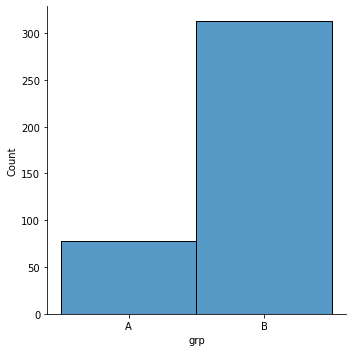

In [40]:
# посмотрим сколько в группе А и В
sns.displot(groups_active_checks.grp)

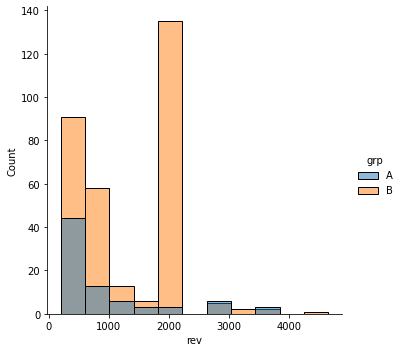

In [41]:
# посмотрим распределение прибыли, оказывается есть выброс для группы B
sns.displot(data=groups_active_checks, x="rev", hue="grp")

Проверим распределение на нормальность

In [42]:
# сделаем датафреймы с группами, где будет хранится rev
group_A = groups_active_checks[groups_active_checks['grp'] == 'A'][['rev']]
group_B = groups_active_checks[groups_active_checks['grp'] == 'B'][['rev']]

# проведем тест на нормальность распределения для А
st, p = stats.normaltest(group_A)
print('st = ', st)
print('p = ', p)

# H0 - Данные имеют нормальное распределение
# H1 - Данные не имеют нормального распределения

if p[0] > 0.05:
    print('Данные имеют нормальное распределение для группы A')
else: 
    print('Данные не имеют нормальное распределение для группы A')

# проведем тест на нормальность распределения для В
st, p = stats.normaltest(group_B)
         
if p[0] > 0.05:
    print('Данные имеют нормальное распределение для группы B')
else: 
    print('Данные не имеют нормальное распределение для группы B')

st =  [30.37841964]
p =  [2.53168688e-07]
Данные не имеют нормальное распределение для группы A
Данные не имеют нормальное распределение для группы B


Проверим гомогенность дисперсии

In [43]:
# Воспользуемся критерием Левена, чтобы оценить дисперсии
# Проведу тест по медианному значению и среднему

# тест по медианному
st, p =stats.levene(np.array(group_A)[:,0], np.array(group_B)[:,0], center='median')

# H0 - Данные имеют близкие дисперсии по медианному значению
# H1 - Данные не имеют близкие дисперсии по медианному значению

if p > 0.05:
    print('Данные имеют близкие дисперсии по медианному значению')
else: 
    print('Данные не имеют близкие дисперсии по медианному значению')
    
# H0 - Данные имеют близкие дисперсии по среднему значению
# H1 - Данные не имеют близкие дисперсии по среднему значению

# тест по среднему
st, p =stats.levene(np.array(group_A)[:,0], np.array(group_B)[:,0], center='mean')
if p > 0.05:
    print('Данные имеют близкие дисперсии по среднему значению')
else: 
    print('Данные не имеют близкие дисперсии по среднему значению')

Данные имеют близкие дисперсии по медианному значению
Данные имеют близкие дисперсии по среднему значению


Данные не нормальные, но дисперсии близки, попробую воспользоваться t-тестом и U-критерий Манна-Уитни. Также посмотрю изменение t-теста, если данные логарифмировать

Сформируем H0 и H1 для rev (так мы проверим ARPU):

H0 - нет статестически важных изменений для rev

H1 - есть статестически важные изменения для rev

In [44]:
# t-test для групп А и В
t_score, p = stats.ttest_ind(a=group_A, b=group_B)

print('t_score = ', t_score)
print('p = ', p)

if p > 0.05:
    print('Нет изменений для rev без логарифмирования t-тестом')
else:
    print('Изменения есть для rev без логарифмирования t-тестом')

# t-test для групп после логарифмирование (для оценки влияние логарифма на тест)
t_score, p = stats.ttest_ind(a=np.log(group_A), b=np.log(group_B))

print('t_score = ', t_score)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для rev c логарифмирования t-тестом')
else:
    print('Изменения есть для rev c логарифмирования t-тестом')

# U-критерий, который не сильно чувствителен к выбросам
U_score, p = stats.mannwhitneyu(x=np.log(group_A), y=np.log(group_B))

print('U_score = ', U_score)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для rev U-критерием')
else:
    print('Изменения есть для rev U-критерием')

t_score =  [-3.11143898]
p =  [0.00199918]
Изменения есть для rev без логарифмирования t-тестом
t_score =  [-3.68042029]
p =  [0.0002657]
Изменения есть для rev c логарифмирования t-тестом
U_score =  [8990.]
p =  [0.00027324]
Изменения есть для rev U-критерием


Сформируем H0 и H1 для конверсии:

H0 - нет статестически важных изменений в переходе людей из одной категории в другую

H1 - есть статестически важные изменения в переходе людей из одной категории в другую

Для конверсии можно использовать Хи‑Квадрат

In [45]:
# Формирование датафреймов, в которых хранится конверсия
group_A = df_gr[df_gr['grp'] == 'A'][['grp','Cr_na','Cr_ac']]
group_B = df_gr[df_gr['grp'] == 'B'][['grp','Cr_na','Cr_ac']]

#Проведем тест Хи-квадратом, при это нужно в группах столбец grp сделать индексами
chi2, p, dof, ex = stats.chi2_contingency([group_A.set_index('grp'), group_B.set_index('grp')], correction=False)

print('chi2 = ', chi2)
print('p = ', p)
if p > 0.05:
    print('Нет изменений для конверсии')
else:
    print('Изменения есть для конверсии')

chi2 =  0.0005421082060230249
p =  0.9814243587713799
Нет изменений для конверсии


Нет разницы между обычным и расширенным датафреймом.

Можно сделать вывод, что прибыль от новой механики оплаты увеличилась, но нет влияние на переход людей из одной категории в другую

Задание 2. SQL
2.1 Очень усердные ученики.

2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

2.1.2 Задача

Дана таблица default.peas:

st_id - int - ID ученика

timest - timestamp - Время решения карточки

correct - bool - Правильно ли решена горошина?

subject - text - Дисциплина, в которой находится горошина


Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

2.2 Оптимизация воронки

2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

2.2.2 Задача

Дана таблицы: default.peas (см. выше), default.studs:

st_id - int - ID ученика

test_grp - text - Метка ученика в данном эксперименте

и default.final_project_check:

st_id - int - ID ученика

sale_time - timestamp - Время покупки

money - int - Цена, по которой приобрели данный курс

subject - text - Дисциплина, в которой находится горошина

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

1)ARPU 

2)ARPAU 

3)CR в покупку 

4)СR активного пользователя в покупку 

5)CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

6)ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [46]:
import pandahouse as ph
connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [47]:
q = ''' 
Select 
    st_id,
    toDate(timest) AS Date,
    correct,
    subject
From {db}.peas
'''
#SQL запрос, чтобы посмотреть данные и изучить их немного

In [48]:
df_data = ph.read_clickhouse(query=q, connection=connection_default) # загрузим данные

In [49]:
df_data.max() # проверим максимальное значение даты

st_id                   996911
Date       2021-10-31 00:00:00
correct                      1
subject          Vizualization
dtype: object

In [50]:
df_data.min() # проверим максимальное значение даты

st_id                   100379
Date       2021-10-30 00:00:00
correct                      0
subject                   Math
dtype: object

Месяц у нас один, но в задании сказано, что нужно оптимальный запрос, следовательно, нужно учесть разные месяца

In [51]:
q = '''
Select
    Date_,
    subject,
    count(st_id) as Count_st_correct
From
    (Select 
        st_id,
        formatDateTime(toDate(timest), '%Y-%m') AS Date_,
        sum(correct) as Count_correct,
        subject
    From {db}.peas
    Group by st_id, Date_, subject
    HAVING Count_correct>=20)
Group by Date_, subject
'''
# SQL запрос, где сначала мы группируем данные о студенте, дате и дисциплине,
#при этом поставим условие, чтобы верных было больше 20
# потом проведем группировку по дате и дисциплине, и посчитаем количество людей

In [52]:
df_count_st_correct = ph.read_clickhouse(query=q, connection=connection_default)

In [53]:
df_count_st_correct

,Date_,subject,Count_st_correct
0,2021-10,Math,18
1,2021-10,Python,22
2,2021-10,Statistics,14
3,2021-10,Vizualization,23
4,2021-10,Theory of probability,16


In [54]:
q = '''
SELECT
    arpu.test_grp as test_grp,
    arpu.ARPU as ARPU,
    arpau.ARPAU as ARPAU,
    cr1.CR as CR_ch,
    cr2.CR as CR_act_ch,
    cr3.CR as CR_act_math_ch

FROM 
(
    SELECT 
        sum(r.money)/count(l.st_id) as ARPU,
        lr.test_grp as test_grp
    FROM {db}.peas as l
    JOIN {db}.studs as lr ON l.st_id = lr.st_id
    LEFT JOIN {db}.final_project_check as r ON lr.st_id = r.st_id
    GROUP BY test_grp
) as arpu

JOIN 
(
    SELECT 
        sum(money)/count(st_id) as ARPAU,
        test_grp
    FROM
    (
        SELECT 
            l.st_id as st_id,
            sum(l.correct) as count_correct,
            lr.test_grp as test_grp,
            sum(r.money) as money
        FROM {db}.peas as l
        JOIN {db}.studs as lr ON l.st_id = lr.st_id
        LEFT JOIN {db}.final_project_check as r ON lr.st_id = r.st_id
        GROUP BY st_id, test_grp
        HAVING count_correct > 10
    )
    GROUP BY test_grp
) as arpau ON arpu.test_grp = arpau.test_grp

JOIN 
(
    SELECT 
        sum(case when toDateTime(sale_time) != '1970-01-01 03:00:00' THEN 1 ELSE 0 END)/sum(case when toDateTime(timest) != '1970-01-01 03:00:00' THEN 1 ELSE 0 END) AS CR,
        test_grp
    FROM 
    (
        SELECT 
            max(toDateTime(r.sale_time)) as sale_time,
            max(toDateTime(l.timest)) as timest, 
            l.st_id as st_id,
            lr.test_grp as test_grp
        FROM default.peas as l
        JOIN default.studs as lr ON l.st_id = lr.st_id
        LEFT JOIN default.final_project_check as r ON lr.st_id = r.st_id
        GROUP BY st_id, test_grp
    )
    GROUP BY test_grp
) as cr1 ON arpu.test_grp = cr1.test_grp

JOIN 
(
    SELECT 
        sum(case when sale_time != '1970-01-01 03:00:00' THEN 1 ELSE 0 END)/sum(case when timest != '1970-01-01 03:00:00' THEN 1 ELSE 0 END) AS CR,
        test_grp
    FROM 
    (
        SELECT 
            l.st_id as st_id,
            max(toDateTime(l.timest)) AS timest,
            sum(l.correct) as count_correct,
            lr.test_grp as test_grp,
            min(toDateTime(r.sale_time)) as sale_time
        FROM {db}.peas as l
        JOIN {db}.studs as lr ON l.st_id = lr.st_id
        LEFT JOIN {db}.final_project_check as r ON lr.st_id = r.st_id
        WHERE r.sale_time > l.timest OR r.sale_time == '1970-01-01 03:00:00'
        GROUP BY st_id, test_grp
        HAVING count_correct > 10
    )
    GROUP BY test_grp
) as cr2 ON arpu.test_grp = cr2.test_grp

JOIN 
(
    SELECT 
        sum(case when sale_time != '1970-01-01 03:00:00' THEN 1 ELSE 0 END)/sum(case when timest != '1970-01-01 03:00:00' THEN 1 ELSE 0 END) AS CR,
        test_grp
    FROM 
    (
        SELECT 
            l.st_id as st_id,
            max(toDateTime(l.timest)) AS timest,
            sum(l.correct) as count_correct,
            lr.test_grp as test_grp,
            min(toDateTime(r.sale_time)) as sale_time
        FROM {db}.peas as l
        JOIN {db}.studs as lr ON l.st_id = lr.st_id
        LEFT JOIN {db}.final_project_check as r ON lr.st_id = r.st_id
        WHERE (r.sale_time > l.timest OR r.sale_time == '1970-01-01 03:00:00') AND l.subject = 'Math'
        GROUP BY st_id, test_grp
        HAVING count_correct >= 2
    )
    GROUP BY test_grp
) as cr3 ON arpu.test_grp = cr3.test_grp
'''
# SQL запрос, который составит из 5 JOIN
# 1 JOIN считает ARPU, объединяя таблицы, а потом разделили по группам, а далее посчитали метрику
# 2 JOIN считает ARPAU, объединяя таблицу, а потом разделяя по группам и проведя фильтр по количеству пройденных ответов,
# а далее посчитав метрику
# 3 JOIN считает CR_ch, объединяя таблицу, а потом разделяя на группы при этом учитываем, что отношения id к времени равно 1:т
# поэтому вы агрегируем так, чтобы было одно время, а после используем время для подсчета количество оплат 
# и количество пройденный занятий, и считаем метрику
# 4 JOIN похож на 3 JOIN, но вводится оценка людей по количеству пройденных занятий, для этого мы агрегируем и фильтруем
# по количеству успешно пройденных тестов
# 5 JOIN похож на 4 JOIN, но мы включаем фильт по предмету математика, а также изменили количество успешно пройденных занятий

In [55]:
df_stat = ph.read_clickhouse(query=q, connection=connection_default)

In [56]:
df_stat

,test_grp,ARPU,ARPAU,CR_ch,CR_act_ch,CR_act_math_ch
0,control,8106.849315,4.516535e+05,0.090909,0.058333,0.083333
1,pilot,23572.618507,1.587268e+06,0.209790,0.228261,0.142857


Задание 3. Python

3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [57]:
def add_data(groups, groups_add):
    if len(groups_add.columns) == 2 and len(groups.columns) == 2: # проверим, чтобы было две колонки в датафрейме groups_add
        k = 0 # счётчик правильных типов данных в датафрейме groups_add
        z = 0 # счётчик правильных типов данных в датафрейме groups
        for column in groups_add.columns: # перебираем все колонки
            if groups_add[column].dtype == 'int64': # ищем колонку с типо int
                int_add = column # запоминаем название колонки с int, там предположительно id
                k += 1
            elif groups_add[column].dtype == 'object': # ищем колонку с типо object, там предположительно группы
                str_add = column # запоминаем название колонки
                k += 1
            else: print('В датафрейме groups_add неверные типы данных, id должен быть int64, а grp должен быть object')
        for column in groups.columns: # перебираем все колонки
            if groups[column].dtype == 'int64': # ищем колонку с типо int
                int_gr = column # запоминаем название колонки с int, там предположительно id
                z += 1
            elif groups[column].dtype == 'object': # ищем колонку с типо object, там предположительно группы
                str_gr = column # запоминаем название колонки
                z += 1
            else: print('В датафрейме groups неверные типы данных, id должен быть int64, а grp должен быть object')
        
        if k == 2 and z == 2: 
            if set(groups_add[str_add].unique()) == set(groups[str_gr].unique()): # проверка на правильные названия групп 
                # переименнуем колонку с int в id
                groups_add = groups_add.rename(columns={int_add:'id'})
                groups = groups.rename(columns={int_gr:'id'})
                
                # переименнуем колонку с object в grp
                groups_add = groups_add.rename(columns={str_add:'grp'})
                groups = groups.rename(columns={str_gr:'grp'})

                # объединяем, в groups по идее должны быть id и grp
                groups_big = pd.concat([groups,groups_add]) 
                return groups_big # возвращаем датафрейм
            else: print("В датафрейме неверные данные о группах")
    else: print("groups_add и groups должен иметь две колонки")
    return None

In [58]:
add_data(groups, groups_add)

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [59]:
def plt_data(groups):
    if 'grp' in list(groups.columns):
        # берем все колонки, кроме groups
        for col in groups.columns:
            if col != 'grp':
                # Построение графика с использованием переменной 'grp' на оси x
                sns.barplot(x='grp', y=col, data=groups)
                plt.show()
    else: print('Нет столбца групп')

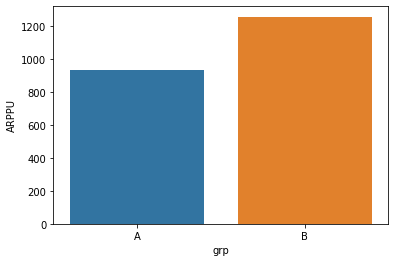

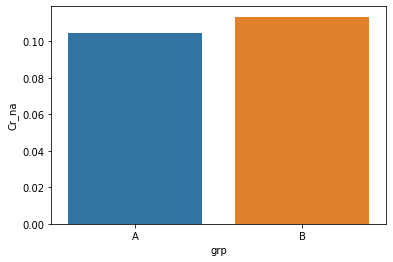

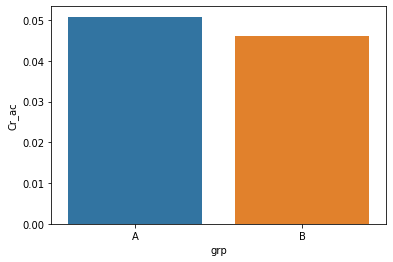

In [60]:
plt_data(df_gr)